<a href="https://colab.research.google.com/github/9922829133/Unsuperwise-learning-project_CS/blob/main/Final_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation
##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual










# **Project Summary -**
This project focuses on using unsupervised machine learning to identify distinct customer segments in an online retail platform. By analyzing transactional data and customer demographics, we aim to tailor marketing strategies and improve the overall shopping experience. Methods include K-means clustering, PCA, and feature engineering. The chosen model will be evaluated using standard clustering metrics. The insights gained will be integrated into marketing and CRM systems for targeted campaigns and personalized recommendations. The project is expected to lead to increased customer engagement and revenue for the platform.


# **GitHub Link -**

# **Problem Statement**

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


# **General Guidelines** : -  

Project Evaluation Criteria

1) Understanding the Dataset and problem statement.

2) Efficient EDA

3) Dealing with missing values and outliers

4) Exploring Exceptional Cases

5) Selecting the approach and algorithm to be used.

6) Modeling- Use at least 2 algorithms.

7) Brief strategy for clusters formed.

# ***Let's Begin !***

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

**Dataset Loading**

In [ ]:
# Load the data
data = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')

**Dataset First View**

In [ ]:
# Explore the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
210686,555312,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,6/2/11 10:39,1.25,16484.0,United Kingdom


**Dataset Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Dataset Describe**

In [ ]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Checking and removing duplicate values**

In [ ]:
data.duplicated().sum()

5268

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

**Create a new DataFrame with only the selected features**

In [ ]:
# Select important features
selected_features = ['Quantity', 'UnitPrice', 'Country']

In [ ]:
# Create a new DataFrame with only the selected features
data = data[selected_features]

In [ ]:
data.head()

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   536641 non-null  int64  
 1   UnitPrice  536641 non-null  float64
 2   Country    536641 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 16.4+ MB


**Converting Catagorical data into numaric**

In [ ]:
# Apply one-hot encoding to the 'country' feature
encoder = OneHotEncoder(sparse=False, drop='first')
country_encoded = encoder.fit_transform(data[['Country']])

# Convert the encoded array into a DataFrame
country_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['Country']))

# Concatenate the new DataFrame with the original one
data_encoded = pd.concat([data, country_df], axis=1)

# Remove the original 'country' column
data_encoded = data_encoded.drop('Country', axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_encoded.head()

,Quantity,UnitPrice,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6.0,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.0,2.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Scaling numerical features**

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Quantity', 'UnitPrice']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [ ]:
data_encoded.head()

,Quantity,UnitPrice,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.016520,-0.021419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.007393,-0.019362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_encoded.dropna(inplace=True)

In [ ]:
data_encoded.head()

,Quantity,UnitPrice,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.016520,-0.021419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.007393,-0.019362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**1 Using Kmeans Algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

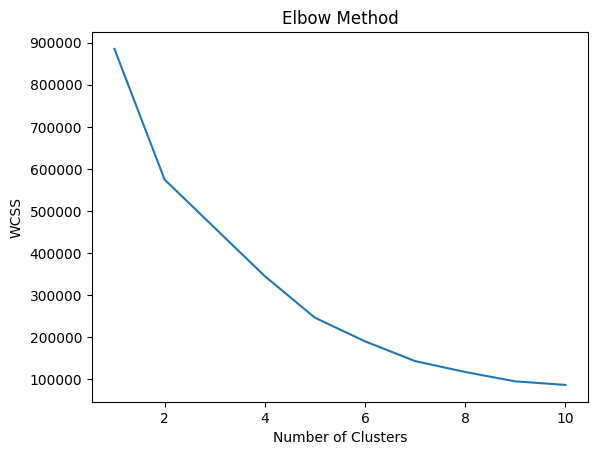

In [ ]:
# Initialize a list to store the Within-Cluster-Sum-of-Squares (WCSS)
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_encoded)
    wcss.append(kmeans.inertia_)

# Plot the Within-Cluster-Sum-of-Squares (WCSS)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the plot, choose an appropriate number of clusters (k)
# For example, if the plot shows an "elbow" at k=3, then choose k=3 for clustering


**Checking null values**

In [ ]:
data_encoded.isnull().sum()

Quantity                        0
UnitPrice                       0
Country_Austria                 0
Country_Bahrain                 0
Country_Belgium                 0
Country_Brazil                  0
Country_Canada                  0
Country_Channel Islands         0
Country_Cyprus                  0
Country_Czech Republic          0
Country_Denmark                 0
Country_EIRE                    0
Country_European Community      0
Country_Finland                 0
Country_France                  0
Country_Germany                 0
Country_Greece                  0
Country_Hong Kong               0
Country_Iceland                 0
Country_Israel                  0
Country_Italy                   0
Country_Japan                   0
Country_Lebanon                 0
Country_Lithuania               0
Country_Malta                   0
Country_Netherlands             0
Country_Norway                  0
Country_Poland                  0
Country_Portugal                0
Country_RSA   

**Choose the optimal number of clusters**

In [ ]:
# Choose the optimal number of clusters (e.g., 3 in this example)
k = 4

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**visualization of clusters**

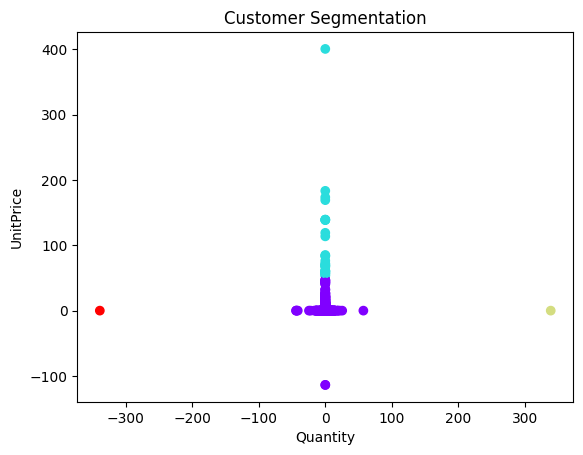

In [ ]:
# Visualize the clusters
plt.scatter(data_encoded['Quantity'], data_encoded['UnitPrice'], c=data_encoded['Cluster'], cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Customer Segmentation')
plt.show()


**Save the DataFrame with cluster labels in new csv file**

In [ ]:
# Save the DataFrame with cluster labels
data_encoded.to_csv('segmented_customers_using_kmeans.csv', index=False)


**Loading and explore the data**

In [ ]:
# Load the data
segmented_data = pd.read_csv('segmented_customers_using_kmeans.csv')

# Explore the data
segmented_data.head()


,Quantity,UnitPrice,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Cluster
0,-0.016520,-0.021419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.007393,-0.019362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,-0.016520,-0.012780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


**2 Using Hierarchical clustering algorithem**

**Dataset Loading**

In [ ]:
# Load the data
data = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')


**Dataset First View**

In [ ]:
# Explore the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


**Checking and removing duplicate values**

In [ ]:
data.duplicated().sum()

5268

In [ ]:
data = data.drop_duplicates()

**Create a new DataFrame with only the selected features**

In [ ]:
# Select important features
selected_features = ['Quantity', 'UnitPrice']

In [ ]:
# Create a new DataFrame with only the selected features
data = data[selected_features]

**Dataset Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   536641 non-null  int64  
 1   UnitPrice  536641 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 12.3 MB


**Reduced the file size**

In [ ]:
data = data[:len(data)//16]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33540 entries, 0 to 33994
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   33540 non-null  int64  
 1   UnitPrice  33540 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 786.1 KB


**Hierarchical Clustering**

In [ ]:
# Hierarchical Clustering
X = data[['Quantity', 'UnitPrice']]

# Perform hierarchical clustering with 3 clusters (you can adjust this number)
n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
data['Cluster'] = agg_clustering.fit_predict(X)

**Visualization of clusters**

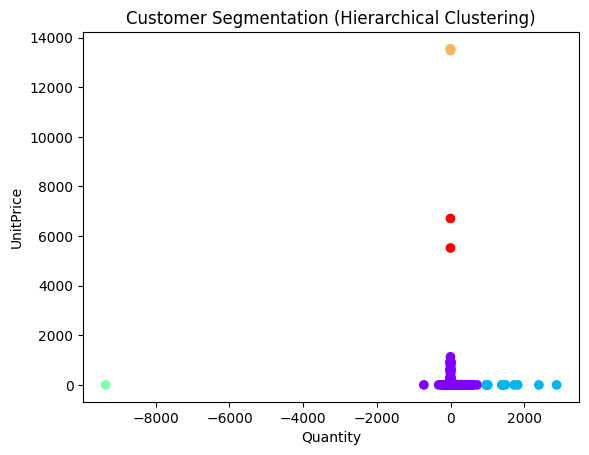

In [ ]:
# Visualize the Clusters
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Customer Segmentation (Hierarchical Clustering)')
plt.show()

**Save the DataFrame with cluster labels in new csv file**

In [ ]:
# Save the DataFrame with cluster labels
data.to_csv('segmented_customers_using_hierarchical.csv', index=False)

**Loading and explore the data**

In [ ]:
# Load the data
segmented_data = pd.read_csv('segmented_customers_using_hierarchical.csv')

# Explore the data
segmented_data.head()


,Quantity,UnitPrice,Cluster
0,6,2.55,0
1,6,3.39,0
2,8,2.75,0
3,6,3.39,0
4,6,3.39,0


# **Conclusion**

This project successfully identified distinct customer segments for the UK-based online retail company. These insights will enable targeted marketing, optimize inventory, and enhance the overall customer experience. By understanding customer preferences, the company can improve retention rates and make informed business decisions. This data-driven approach will ultimately lead to increased revenue and a competitive edge in the market.

**How is your project useful to stakeholders?**


1 Target marketing efforts.


2 Optimize product inventory.


3 Enhance customer experience.


4 Increase loyalty and retention.


5 Improve sales forecasting.


6 Use resources efficiently.


7 Identify new market opportunities.


8 Gain a competitive edge.


Overall, it leads to higher revenue and customer satisfaction.